# Семинар по Pytorch.
#### Курс по компьютерному зрению школы MADE.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import sklearn
import PIL


def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    
def show_grayscale_image(image, figsize=(16, 9)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

Установка: https://pytorch.org/get-started/locally/  
В этом ноутбуке будут разобраны основные особенности фреймворка Pytorch. Pytorch - это как Numpy, только умеет эффективно автоматически считать градиенты.

In [2]:
import torch
print (torch.__version__)

1.4.0


In [3]:
import torchvision
from torch import nn
import os
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import tqdm

In [4]:
# проверить, доступна ли у вас cuda. 
torch.cuda.is_available()

False

# Базовые операции

In [5]:
# numpy

x = np.arange(25).reshape(5, 5)

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(np.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(np.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(np.cumsum(x, axis=1)))

X :
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

X.shape : (5, 5)
 
Возвести в квадрат:
 [[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]

X*X^T  :
 [[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]

Cреднее по столбцам :
 [10. 11. 12. 13. 14.]

Сумма по строкам:
 [[  0   1   3   6  10]
 [  5  11  18  26  35]
 [ 10  21  33  46  60]
 [ 15  31  48  66  85]
 [ 20  41  63  86 110]]



In [6]:
# torch

x = torch.arange(25).reshape(5, 5).float()

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(torch.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(torch.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(torch.cumsum(x, axis=1)))

X :
 tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

X.shape : torch.Size([5, 5])
 
Возвести в квадрат:
 tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.],
        [100., 121., 144., 169., 196.],
        [225., 256., 289., 324., 361.],
        [400., 441., 484., 529., 576.]])

X*X^T  :
 tensor([[  30.,   80.,  130.,  180.,  230.],
        [  80.,  255.,  430.,  605.,  780.],
        [ 130.,  430.,  730., 1030., 1330.],
        [ 180.,  605., 1030., 1455., 1880.],
        [ 230.,  780., 1330., 1880., 2430.]])

Cреднее по столбцам :
 tensor([10., 11., 12., 13., 14.])

Сумма по строкам:
 tensor([[  0.,   1.,   3.,   6.,  10.],
        [  5.,  11.,  18.,  26.,  35.],
        [ 10.,  21.,  33.,  46.,  60.],
        [ 15.,  31.,  48.,  66.,  85.],
        [ 20.,  41.,  63.,  86., 110.]])



# Pytorch - почти Numpy.
Вы можете создавать тензоры, смотреть на их градиенты, не создавая сессии как в tensorflow.
Названия методов очень похожи. Если они отличаются - загляните в таблицу: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users


# Pytroch сам считает backpropagation для нас с помощью модуля autograd

In [7]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print (loss)

# запускаем backprop

loss.backward()

tensor(1., grad_fn=<MeanBackward0>)


In [8]:
# градиенты доступны в поле .grad:
preds.grad

tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])

In [9]:
# градиенты можно занулить
preds.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [10]:
# теперь градиенты снова 0
preds.grad

tensor([0., 0., 0., 0., 0.])

###  Градиенты накапливаются при каждом вызове backward()

In [11]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print (loss)

# запускаем backprop
for i in range(5):
    loss.backward(retain_graph=True)
    print (i, preds.grad)

tensor(1., grad_fn=<MeanBackward0>)
0 tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])
1 tensor([-0.4000, -0.4000, -0.4000, -0.4000, -0.4000])
2 tensor([-0.6000, -0.6000, -0.6000, -0.6000, -0.6000])
3 tensor([-0.8000, -0.8000, -0.8000, -0.8000, -0.8000])
4 tensor([-1., -1., -1., -1., -1.])


# Пишем свою логистическую регрессию на пайторче

In [12]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                   random_state=0, cluster_std=3)

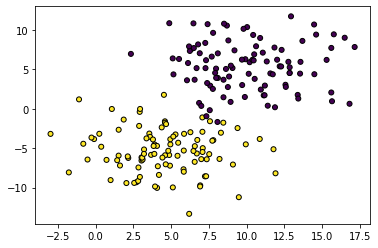

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# Напоминание. Как это было в Sklearn:

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X, y)

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model.coef_

array([[-0.33884888, -1.25771748]])

In [18]:
model.intercept_

array([1.61293965])

## Визуализируем разделяющую плоскость

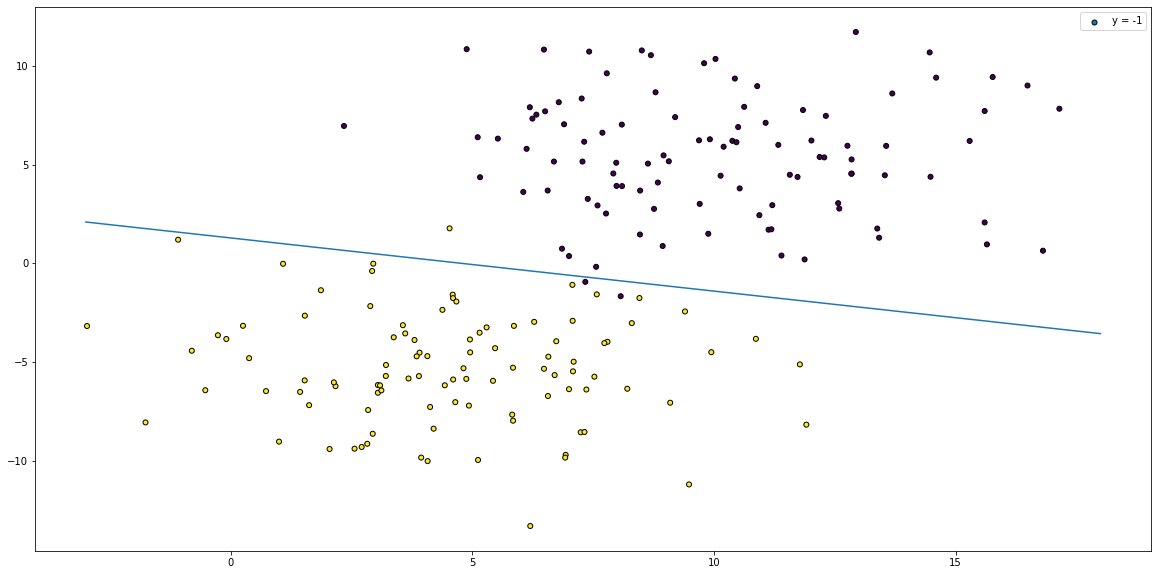

In [22]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
w_0 = model.intercept_[0]

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-3, 18, 1000)


y_arr = (-w_1 * x_arr - w_0) / w_2


plt.plot(x_arr, y_arr)
plt.show()

# Напишем свою логистическую регрессию на пайторче

In [23]:
from sklearn.datasets import make_blobs
import sklearn

X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                   random_state=0, cluster_std=3)

In [24]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [25]:
# cоздайте тензор из X и y
X = torch.tensor(X)
y = torch.tensor(y)

In [26]:
assert type(X) == torch.Tensor
assert type(y) == torch.Tensor

In [31]:
# cоздайте веса w и отступ b для линейной модели. какие у них должны быть размерности?
# не забудьте выставить нужные значения в поля required_grad и dtype

w = torch.zeros(2, requires_grad=True, dtype=float)
b = torch.zeros(1, requires_grad=True, dtype=float)

In [32]:
assert w.requires_grad
assert len(w.shape) == 1
assert w.shape[0] == X.shape[1]
assert w.dtype == X.dtype
assert b.requires_grad
assert len(b.shape) == 1
assert b.dtype == X.dtype

In [33]:
def binary_cross_entropy(y, y_predicted):
    """
    y: binary tensor, shape: N, example: [0, 1, 0, 1, 1]
    y_pred: tensor with values from 0 to 1. shape: N. example: [0.2, 0, 1, 0.75, 0.999]
    
    output: tensor, shape: N
    
    """
    return -(y*torch.log(y_predicted) + (1-y)*torch.log(1-y_predicted))


In [34]:
y_test = torch.tensor([1, 0, 1, 1])
y_pred = torch.tensor([0.7, 0.3, 0.5, 0.9])
bce_correct = torch.tensor([0.3567, 0.3567, 0.6931, 0.1054])
bce_predicted = binary_cross_entropy(y_test, y_pred)
assert bce_predicted.shape == y_test.shape
assert torch.allclose(bce_predicted, bce_correct, rtol=1e-03)

In [38]:
y_pred = torch.matmul(X,w) + b

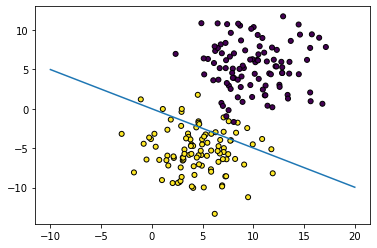

Iteration: 999, Loss: 135.09716844657942


In [39]:
from IPython.display import clear_output

step=0.00000001

for i in range(1000):
    
    y_pred = torch.sigmoid(torch.matmul(X,w) + b)
    loss = torch.sum(binary_cross_entropy(y, y_pred))
        
    loss.backward()    
    
    # обновите веса
    w.data-=step*w.grad.data
    b.data-=step*b.grad.data

    # обнулите градиенты
    w.grad.zero_()
    b.grad.zero_()
    
    if (i+1)%5==0:
    #if True:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        
        w_1 = w.data[0]
        w_2 = w.data[1]
        w_0 = b.data[0]
        
        
        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i, loss))


# Теперь все за нас делает пайторч

In [40]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                   random_state=0, cluster_std=0.6)

In [41]:
X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                   random_state=0, cluster_std=3)

In [42]:
X = torch.tensor(X)
y = torch.tensor(y)

# Инициализируем модель

In [43]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Linear(in_features=2, out_features=1, bias=True)

In [44]:
model

Linear(in_features=2, out_features=1, bias=True)

In [45]:
model.weight

Parameter containing:
tensor([[-0.5670, -0.5924]], requires_grad=True)

In [46]:
model.bias

Parameter containing:
tensor([0.3351], requires_grad=True)

In [47]:
model.weight.data.dtype

torch.float32

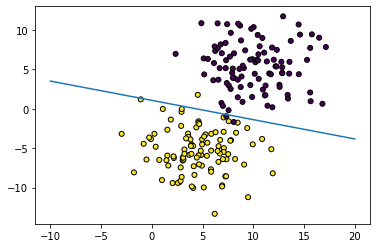

Iteration: 999, Loss: 0.046996571123600006


In [61]:
from IPython.display import clear_output


for i in range(1000):
    
    # считаем предсказание

    y_pred = torch.sigmoid(model(X.float()))
    
    
    # считаем лосс
    
    loss = criterion(y_pred.flatten().float(), y.float())
    
    # прокидываем градиенты
    
    loss.backward()
    
    
    # делаем шаг оптимизатором
        
    optim.step()     
    
    # зануляем градиенты
    
    optim.zero_grad() 
    
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        
        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]

        w_0 = model.bias.data[0]
        
        
        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Окей, пусть теперь проблема нелинейная

In [62]:
from sklearn.datasets import make_moons

In [63]:
X, y = make_moons(n_samples=200, noise=.1, random_state=17)

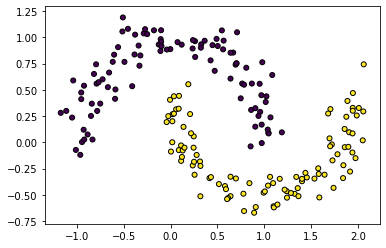

In [64]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [65]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Linear(in_features=2, out_features=1, bias=True)

In [69]:
from IPython.display import clear_output


for i in range(1000):
    
    # считаем предсказание

    y_pred = torch.sigmoid(model(X.float()))
    
    
    # считаем лосс
    
    loss = criterion(y_pred.flatten().float(), y.float())
    
    # прокидываем градиенты
    
    loss.backward()
    
    
    # делаем шаг оптимизатором
        
    optim.step()     
    
    # зануляем градиенты
    
    optim.zero_grad() 
    
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        
        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]

        w_0 = model.bias.data[0]
        
        
        x_arr = torch.linspace(-1, 22, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

KeyboardInterrupt: 

# Визуализируем разделяющую плоскость

In [67]:
h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
model.eval()
Z = torch.sigmoid(model(input_tensor))
Z = Z.reshape(xx.shape)

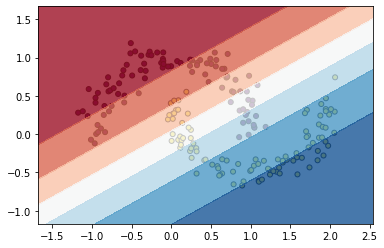

In [68]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

plt.show()

# Делаем модель сложнее

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


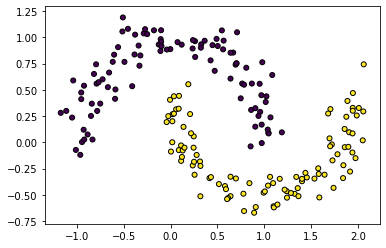

In [70]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

# Cоберите двуслойную модель

In [71]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 2))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(2, 1))

In [72]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2.)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=1, bias=True)
)

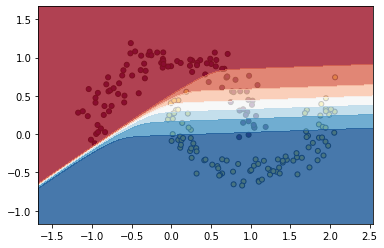

Iteration: 29999, Loss: 0.22200939059257507


In [73]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(30000):
    
    y_pred = torch.sigmoid(model(X.float()))
        
    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
        
    optim.step()           
    optim.zero_grad() 
    if (i+1)%500==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Усложним модель (увеличим количество слоев)

In [74]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 2))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(2, 2))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(2, 1))

In [75]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2., momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=2, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=2, out_features=1, bias=True)
)

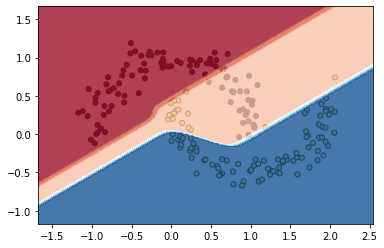

Iteration: 29999, Loss: 0.1537477970123291


In [77]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(30000):
    
    y_pred = torch.sigmoid(model(X.float()))
        
    loss = criterion(y_pred.flatten(), y.float())
    
    
    loss.backward()
    optim.step()           
    optim.zero_grad() 
    
    if (i+1)%500==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Еще усложним модель

In [78]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 5))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(5, 5))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(5, 1))


In [79]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2, momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=1, bias=True)
)

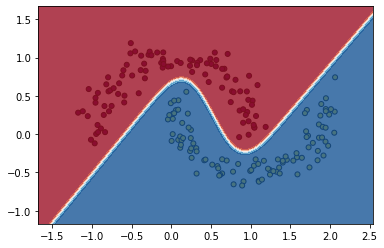

Iteration: 2999, Loss: 3.300598109490238e-05


In [80]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(3000):

    y_pred = torch.sigmoid(model(X.float()))
        
    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
    optim.step()           
    optim.zero_grad() 
    
    if (i+1)%50==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Сделаем > 2 классов

In [81]:
from sklearn.datasets import make_circles

In [82]:
# blobs with varied variances
X, y = make_blobs(n_samples=400,
                             cluster_std=[1.0, 1.5, 0.5],
                             random_state=17)

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


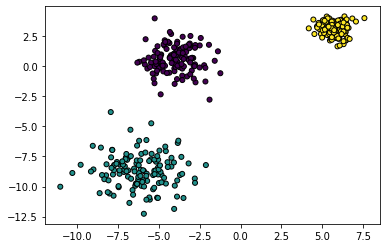

In [93]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X = torch.tensor(X).float()
y = torch.tensor(y).float()

In [94]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 5))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(5, 5))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(5, 3))

In [95]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=3, bias=True)
)

In [99]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(1000):
    
    y_pred = torch.sigmoid(model(X.float()))
        
    loss = criterion(y_pred.float(), y.float())
    
    loss.backward()
    
    optim.step()           
    optim.zero_grad() 
    if (i+1)%25==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = model(input_tensor)
        Z = torch.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)
        
        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

RuntimeError: expected scalar type Long but found Float

# Cверточные сети

In [ ]:
# cоздадим свертку
layer = torch.nn.Conv2d(1, 1, kernel_size=3)

In [ ]:
layer.weight

In [ ]:
# вес доступен через .weight.data
layer.weight.data = torch.ones_like(layer.weight.data) 
layer.weight.data /= torch.sum(layer.weight.data)

In [ ]:
layer.weight.data

In [ ]:
layer.bias.data = torch.zeros_like(layer.bias.data)

In [ ]:
layer.eval()

In [ ]:
input_tensor = torch.arange(9).reshape(1, 1, 3, 3)

In [ ]:
input_tensor.shape

In [ ]:
input_tensor

In [ ]:
output_tensor = layer(input_tensor.float())

In [ ]:
output_tensor

# Модификация весов свертки

In [ ]:
file = './data/photos/lecun.jpeg'

In [ ]:
# прочитайте изображение и переведите его в grayscale
img = ...

In [ ]:
assert img.shape == (3960, 2640)

In [ ]:
show_grayscale_image(img)

In [ ]:
# получим функцию, которая переводит изображение в тензор
to_tensor = torchvision.transforms.ToTensor()

In [ ]:
img_tensor = to_tensor(img)

In [ ]:
img_tensor.shape

In [ ]:
img_tensor = ... # сделаейте так, чтобы assert в следующей строчке прошел

In [ ]:
assert img_tensor.shape == torch.Size([1, 1, 3960, 2640])

### Создадим свертку, которая размоет изображение

In [ ]:
kernel_size = 50
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

In [ ]:
# обновите веса так, чтобы получилась свертка, которая размывает изображение

In [ ]:
layer.weight.data

In [ ]:
layer.eval()

In [ ]:
output_tensor = layer(img_tensor)

In [ ]:
output_tensor.shape

In [ ]:
# функция, переводящее тензор в PIL-изображение
to_pil_image = transforms.ToPILImage()

In [ ]:
output_img = to_pil_image(output_tensor.squeeze(0))

In [ ]:
output_img

# Посмотрим на границы

In [ ]:
kernel_size = 3
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

In [ ]:
# cделайте свертку, которая выделит границы

In [ ]:
layer.eval()

In [ ]:
output_tensor = layer(img_tensor)

In [ ]:
output_tensor.shape

In [ ]:
to_pil_image = transforms.ToPILImage()

In [ ]:
output_img = to_pil_image(output_tensor.squeeze(0))

In [ ]:
output_img

# Окей, давайте поработаем с картинками

In [ ]:
import torchvision
from torch import nn
import os
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import tqdm

In [ ]:
root = './data'
if not os.path.exists(root):
    os.mkdir(root)
    
trans = transforms.Compose([transforms.ToTensor(), 
                            transforms.Normalize((0.5,), (1.0,))])

train_set = MNIST(root=root, train=True, transform=trans, download=True)
test_set = MNIST(root=root, train=False, transform=trans, download=True)

In [ ]:
batch_size = 50

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

In [ ]:
# посмотрим как выглядят картинки
print ("Class: {}".format(train_set[0][1]))
plt.imshow(train_set[0][0][0].numpy())
plt.show()

# Обучим бэйзлайн

In [ ]:
model = nn.Sequential()
...

In [ ]:
model

In [ ]:
criterion = ...

optim = ...

model.train()

In [ ]:
for epoch in range(20):
    # trainning
    ave_loss = 0
    model.train()
    for batch_idx, (x, target) in enumerate(train_loader):
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optim.step()
        optim.zero_grad()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, loss))

    
    # testing
    correct_cnt, ave_loss = 0., 0.
    total_cnt = 0.
    model.eval()
    for batch_idx, (x, target) in enumerate(test_loader):
        with torch.no_grad():
            out = model(x)
        loss = criterion(out, target)
        pred_label = torch.argmax(out, axis=1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label.cpu() == target.detach()).sum()
        
    print ('===========>>> Test epoch: {} test loss: {:.6f}, test acc: {:.3f}'.format(
        epoch, loss, correct_cnt / total_cnt))

# Соберем сверточную сеть

In [ ]:
model = nn.Sequential()
...

In [ ]:
model.cuda()

In [ ]:
criterion = ...

optim = ...

model.train()

In [ ]:
for epoch in range(20):
    # trainning
    ave_loss = 0
    model.train()
    for batch_idx, (x, target) in enumerate(train_loader):
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optim.step()
        optim.zero_grad()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, loss))

    
    # testing
    correct_cnt, ave_loss = 0., 0.
    total_cnt = 0.
    model.eval()
    for batch_idx, (x, target) in enumerate(test_loader):
        with torch.no_grad():
            out = model(x)
        loss = criterion(out, target)
        pred_label = torch.argmax(out, axis=1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label.cpu() == target.detach()).sum()
        
    print ('===========>>> Test epoch: {} test loss: {:.6f}, test acc: {:.3f}'.format(
        epoch, loss, correct_cnt / total_cnt))